In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 24/01/2020
Initialization for S1PL, Notebook was last run on: 24/01/2020


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
file_path = '/dali/lgrandi/ccapelli/haxcache/final_SR1/selections/'
data = hax.minitrees.load_cache_file(file_path+'bkg_SR1_pax6.10.1_forMichelle.haxcache')

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/minitrees.py:611: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.cut_history = store.get_storer('data').attrs.cut_history


In [4]:
for i in data.columns: print(i)

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

##### Pre-selection: 
- CutS2SingleScatter_HE, CutDAQVeto, CutFlash, CutMuonVeto, CutS2Threshold, CutCS2AreaFractionTopExtended, CutS1AreaFractionTop_he, CutPosDiff_HE, CutS2Width_HE, CutS1SingleScatter_HE, CutS2PatternLikelihoodHE

In [5]:
### Mi interessa ottimizzare il cut per gli eventi al di sotto di S1 = 2x10^4 PE
data['CES'] = CES(data, 'cs2_bottom_nn_tf')
data = data[data['s1']<3e4]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


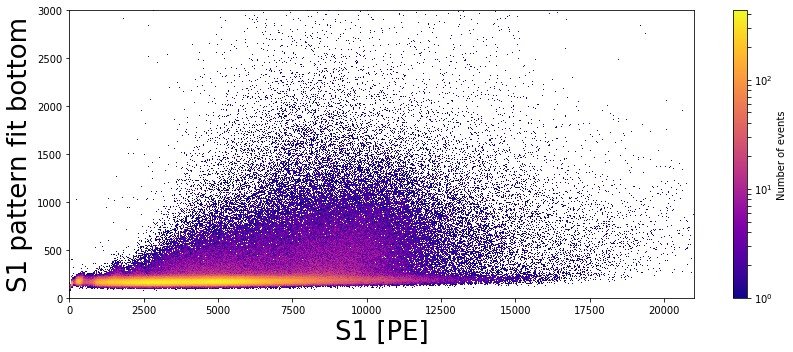

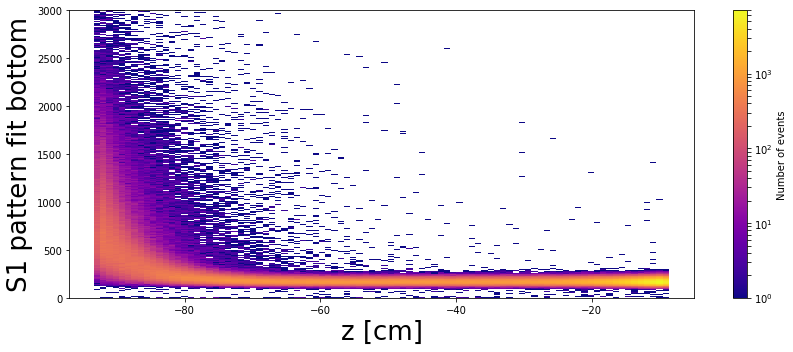

In [6]:
plt.figure(figsize=(12, 5))
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins = (1000, 400), 
           range=((0, 2.1e4), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.hist2d(data['z_3d_nn_tf'], data['s1_pattern_fit_bottom_hax'], bins = (100, 400), 
           range=((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tight_layout()
plt.show()

In [ ]:
##############################################
### Guadiamo come (E,z,S1pl) e (S1,z,S1pl) ###

x = np.linspace(0,2.5e4, 1e3)
m = (93. - 45.)/(0. - 25000.)
q = 93.
y = m*x + q

fig = plt.figure(figsize=(25,8))

plt.subplot(121)
points_1 = plt.scatter(data['CES']/10**3, -data['z_3d_nn_tf'], 
                       c = data['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_1)
plt.xlim(right=3100)
plt.xlabel('E [keV]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.subplot(122)
points_2 = plt.scatter(data['s1'], -data['z_3d_nn_tf'], 
                       c = data['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_2)
plt.plot(x, y, 'k--')
plt.xlim(right=26000)
plt.xlabel('S1 [PE]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [ ]:
def region(df):
    m = (93. - 45.)/(0. - 25000.)
    q = 93.
    return -df['z_3d_nn_tf'] < (df['s1']*m + q)

data['S1_z_region'] = region(data)
data_fr = data[data['S1_z_region']==True]  # Dati nella prima regione, al di sotto della linea
data_sr = data[data['S1_z_region']==False] # Dati nella seconda regione

In [ ]:
#####################################
### (S1; S1 pl) delle due regioni ###

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (1000, 400), range=((0, 2.1e4), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.subplot(122)
plt.hist2d(data_sr['s1'], data_sr['s1_pattern_fit_bottom_hax'], bins = (1000, 400), range=((0, 2.1e4), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tight_layout()
plt.show()

####################################
### (z; S1 pl) delle due regioni ###
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'], bins = (100, 400), range=((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.subplot(122)
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (100, 400), range=((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tight_layout()
plt.show()

### Cut on z
- first region
- second region

In [ ]:
####################################################
### determino gli input per i fit, sono definiti ###
### come lo 0.03% e il 99.7% della distribuzione ###
### normale per ogni slice in z_3d_nn_tf         ###

xbins = np.linspace(-97, -5, 50)
ybins = np.linspace(0, 5e3, 500)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_fr['z_3d_nn_tf'], 
                                          data_fr['s1_pattern_fit_bottom_hax'],
                                          bins=(xbins, ybins))

ybins_center_z = np.asarray([0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)])
xbins_center_z = np.asarray([0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)])

perc_z_high = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z_high[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                                q=0.997, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
xbins_center_valid_z_high_fr, perc_valid_z_high_fr = dropNaNforFit(xbins_center_z, perc_z_high)

perc_z_low = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z_low[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                               q=0.003, var1='z_3d_nn_tf', var2='s1 patter fit hax')

xbins_center_valid_z_low_fr, perc_valid_z_low_fr = dropNaNforFit(xbins_center_z, perc_z_low)
# perc_valid -> 99% s1 pattern fit in s1 slice
# xbins_center_valid -> correspondent s1 to 99,7% s1 pattern fit
del hist_1, xbins_1, ybins_1


####################################################
### Fit del limite superiore nella prima regione ###
init_z_high_fr = [2.16014992e+02, 9.26515951e-04, 1.69452500e-01]
mask_1 = np.where(xbins_center_valid_z_high_fr>-85)

popt_z_high_fr, pcov_z_high_fr = curve_fit(exp, xbins_center_valid_z_high_fr[mask_1], perc_valid_z_high_fr[mask_1], p0=init_z_high_fr)
print('popt_z:\n ', popt_z_high_fr ,'\n\npcov_z: \n', pcov_z_high_fr)

####################################################

####################################################
### Fit del limite inferiore nella prima regione ###

init_z_low_fr = [100, 0]

popt_z_low_fr, pcov_z_low_fr = curve_fit(poly1, xbins_center_valid_z_low_fr, perc_valid_z_low_fr, p0=init_z_low_fr)
print('popt_z:\n ', popt_z_low_fr ,'\n\npcov_z: \n', pcov_z_low_fr)

####################################################

plt.figure(figsize=(15,8))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

plt.subplot(grid[:2, :])

plt.plot(xbins_center_valid_z_high_fr, perc_valid_z_high_fr, 'k+', ms = 7)
plt.plot(xbins_center_valid_z_high_fr[mask_1], exp(xbins_center_valid_z_high_fr[mask_1], *popt_z_high_fr), 'b--')

plt.plot(xbins_center_valid_z_low_fr, perc_valid_z_low_fr, 'k+', ms = 7)
plt.plot(xbins_center_valid_z_low_fr, poly1(xbins_center_valid_z_low_fr, *popt_z_low_fr), 'b--')

plt.xlim(-90,0)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(grid[2, :])
plt.plot(xbins_center_valid_z_high_fr[mask_1], exp(xbins_center_valid_z_high_fr[mask_1], *popt_z_high_fr) - perc_valid_z_high_fr[mask_1], 'k+', ms=4)
plt.plot(xbins_center_valid_z_low_fr, poly1(xbins_center_valid_z_low_fr, *popt_z_low_fr)  - perc_valid_z_low_fr,  'b+', ms=4)

plt.hlines(y=0, xmin=-90, xmax = 0 , linestyles='dashed')
plt.xlim(-90,0)
plt.xlabel('z [cm]', fontsize=26)
plt.tick_params(labelsize=15)

p_ , chi2_ = compute_chi2_p_2(perc_valid_z_high_fr[mask_1], exp(xbins_center_valid_z_high_fr[mask_1], *popt_z_high_fr), len(popt_z_high_fr))

###########################################
### Plot del limite nella prima regione ###
y_h = exp(xbins_center_valid_z_high_fr, *popt_z_high_fr)
y_l = poly1(xbins_center_valid_z_low_fr, *popt_z_low_fr)

plt.figure(figsize=(15,8))
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.plot(xbins_center_valid_z_high_fr, perc_valid_z_high_fr, 'ro', ms = 3)
plt.plot(xbins_center_valid_z_high_fr, perc_valid_z_low_fr, 'ro', ms = 3)

plt.plot(xbins_center_valid_z_low_fr, y_h, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')
plt.plot(xbins_center_valid_z_low_fr, y_l, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')

plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize=(15,8))
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (100, 400), 
           range = ((-97, -5), (0, 5e3)),
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

m = (3500. - 350.)/(-93. + 75.)
q = m*(+75) + 350
x_1 = np.linspace(-93,-75, 50)
y_1 = m*x_1 +q
x_2 = np.linspace(-75,-55, 50)
y_2 = 350 + x_2*0
plt.plot(x_1, y_1, 'b--', lw=3)
plt.plot(x_2, y_2, 'b--', lw=3)

In [ ]:
######################################################
### determino gli input per i fit, sono definiti   ###
### come lo 0.03% e il 99.999% della distribuzione ###
### normale per ogni slice in z_3d_nn_tf           ###
 
m = (3500. - 350.)/(-93. + 75.)
q = m*(+75) + 350
data_sr_tmp = data_sr[((data_sr['s1_pattern_fit_bottom_hax']<(m*data_sr['z_3d_nn_tf'] + q))&(data_sr['z_3d_nn_tf']<-75))|((data_sr['s1_pattern_fit_bottom_hax']<(350))&(data_sr['z_3d_nn_tf']>-75))]
xbins = np.linspace(-93, -65, 15)
ybins = np.linspace(0, 3e3, 100)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_sr_tmp['z_3d_nn_tf'], 
                                          data_sr_tmp['s1_pattern_fit_bottom_hax'],
                                          bins=(xbins, ybins))

ybins_center_z = np.asarray([0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)])
xbins_center_z = np.asarray([0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)])

#perc_z_high = np.empty(len(xbins_center_z))
#for i in tqdm(range(len(hist_1))):
#    perc_z_high[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
#                                q=0.9999999, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
perc_z_high = percentile_numeric(hist=hist_1, ybins=ybins_1, xbins=xbins_1, q=0.98)
xbins_center_valid_z_high_sr, perc_valid_z_high_sr = dropNaNforFit(xbins_center_z, perc_z_high)

perc_z_low = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z_low[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                               q=0.003, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
#perc_z_low = percentile_numeric(hist=hist_1, ybins=ybins_1, xbins=xbins_1, q=0.003)
xbins_center_valid_z_low_sr, perc_valid_z_low_sr = dropNaNforFit(xbins_center_z, perc_z_low)
# perc_valid -> 99% s1 pattern fit in s1 slice
# xbins_center_valid -> correspondent s1 to 99,7% s1 pattern fit
del hist_1, xbins_1, ybins_1


####################################################
### Fit del limite superiore nella prima regione ###
#init_z_high_sr = [2.16014992e+02, 9.26515951e-04, 1.69452500e-01]

#popt_z_high_sr, pcov_z_high_sr = curve_fit(exp, xbins_center_valid_z_high_sr, perc_valid_z_high_sr, p0=init_z_high_sr)
#print('popt_z:\n ', popt_z_high_sr ,'\n\npcov_z: \n', pcov_z_high_sr)

spl_z = interpolate.InterpolatedUnivariateSpline(xbins_center_valid_z_high_sr, perc_valid_z_high_sr, k = 3)
with open('./cut_line/interpolator_z.pkl', 'wb') as f:
    pickle.dump(spl_z, f)
####################################################

####################################################
### Fit del limite inferiore nella prima regione ###
### Vengono presi in cosiderazione solo i valori ###
### tra -80 cm e -60 cm                          ###

init_z_low_sr = [100, 0]
mask = np.where((xbins_center_valid_z_low_sr<-61)&(xbins_center_valid_z_low_sr>-81))
popt_z_low_sr, pcov_z_low_sr = curve_fit(poly1, xbins_center_valid_z_low_sr[mask], perc_valid_z_low_sr[mask], p0=init_z_low_sr)
print('popt_z:\n ', popt_z_low_sr ,'\n\npcov_z: \n', pcov_z_low_sr)

####################################################

#plt.figure(figsize=(15,8))
#grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)
#
#plt.subplot(grid[:2, :])

#plt.plot(xbins_center_valid_z_high_sr, perc_valid_z_high_sr, 'k+', ms = 7)
#plt.plot(xbins_center_valid_z_high_sr, exp(xbins_center_valid_z_high_sr, *popt_z_high_sr), 'b--')

#plt.plot(xbins_center_valid_z_low_sr[mask], perc_valid_z_low_sr[mask], 'k+', ms = 7)
#plt.plot(xbins_center_valid_z_low_sr[mask], poly1(xbins_center_valid_z_low_sr[mask], *popt_z_low_sr), 'b--')

#plt.xlim(-90,0)
#plt.xlabel('z [cm]', fontsize=26)
#plt.ylabel('S1 pattern fit bottom', fontsize=26)
#plt.tick_params(labelsize=20)

#plt.subplot(grid[2, :])
#plt.plot(xbins_center_valid_z_high_sr, exp(xbins_center_valid_z_high_sr, *popt_z_high_sr) - perc_valid_z_high_sr, 'k+', ms=4)
#plt.plot(xbins_center_valid_z_low_sr[mask], poly1(xbins_center_valid_z_low_sr[mask], *popt_z_low_sr)  - perc_valid_z_low_sr[mask],  'b+', ms=4)

#plt.hlines(y=0, xmin=-90, xmax = 0 , linestyles='dashed')
#plt.xlim(-90,0)
#plt.xlabel('z [cm]', fontsize=26)
#plt.tick_params(labelsize=15)

#p_ , chi2_ = compute_chi2_p_2(perc_valid_z_high_sr, exp(xbins_center_valid_z_high_sr, *popt_z_high_sr), len(popt_z_high_sr))

###########################################
### Plot del limite nella prima regione ###
xx = np.linspace(min(xbins_center_z),max(xbins_center_z), 100)
y_h = spl_z(xx)
#y_h = exp(xx, *popt_z_high_sr)
y_l = poly1(xx, *popt_z_low_sr)

plt.figure(figsize=(15,8))
plt.hist2d(data_sr_tmp['z_3d_nn_tf'], data_sr_tmp['s1_pattern_fit_bottom_hax'], bins = (100, 400), range = ((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.plot(xbins_center_valid_z_high_sr, perc_valid_z_high_sr, 'ro', ms = 3)
plt.plot(xbins_center_valid_z_low_sr, perc_valid_z_low_sr, 'ro', ms = 3)

plt.plot(xx, y_h, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')
plt.plot(xx, y_l, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')

plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
#####################################
### Parametri per il taglio su z  ###
### con relativa funzione associa ###
print('Prima regione: ')
print('popt_z high:\n ', popt_z_high_fr ,'\n\npcov_z high: \n', pcov_z_high_fr)   # exponential (exp)
print('\npopt_z low:\n ', popt_z_low_fr ,'\n\npcov_z low: \n', pcov_z_low_fr)     # linear function (poly1)

print('\nSeconda regione: ')
#print('popt_z high:\n ', popt_z_high_sr ,'\n\npcov_z high: \n', pcov_z_high_sr)   # exponential (exp)
print('\npopt_z low:\n ', popt_z_low_sr ,'\n\npcov_z low: \n', pcov_z_low_sr)     # linear function (poly1)

In [ ]:
def CutS1PF_z_fr(df):
    popt_z_high_fr = [2.36382248e+02, 7.21030470e-03, 1.11380998e-01] 
    popt_z_low_fr =  [1.02944787e+02, 2.46749525e-02] 
    
    cutline_z_high_fr = df['s1_pattern_fit_bottom_hax'] < exp(df['z_3d_nn_tf'], *popt_z_high_fr)
    cutline_z_low_fr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_fr)
    return (cutline_z_high_fr)&(cutline_z_low_fr)

def CutS1PF_z_sr(df):
    #popt_z_high_sr = [3.19285881e+02, 1.40465893e-05, 2.01978853e-01] 
    popt_z_low_sr =  [95.74229697, -0.29942283]
    
    #cutline_z_high_sr = df['s1_pattern_fit_bottom_hax'] < exp(df['z_3d_nn_tf'], *popt_z_high_sr)
    cutline_z_high_sr = df['s1_pattern_fit_bottom_hax']< spl_z(df['z_3d_nn_tf'])
    cutline_z_low_sr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_sr)
    return (cutline_z_high_sr)&(cutline_z_low_sr)

data_fr['CutS1PF_z_fr'] = CutS1PF_z_fr(data_fr)
data_sr['CutS1PF_z_sr'] = CutS1PF_z_sr(data_sr)

In [ ]:
data_fr_GOOD = hax.cuts.selection(data_fr, data_fr['CutS1PF_z_fr'] == True)
data_sr_GOOD = hax.cuts.selection(data_sr, data_sr['CutS1PF_z_sr'] == True)

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD['z_3d_nn_tf'], data_fr_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (100, 1000),
           range = ((-97, -5), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD['z_3d_nn_tf'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], bins = (100, 1000),
           range = ((-97, -5), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_sr['s1'], data_sr['s1_pattern_fit_bottom_hax'], bins = (200, 400), 
           range=((0, 2.1e4), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD['s1'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], bins = (200, 400), 
           range=((0, 2.1e4), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

### Cut on S1
- first region
- second region

In [ ]:
#######################################################
### Calcolo deigli input per il fit del cut su S1   ###     
### Abbiamo tre diversi intervalli, a bassi S1 per  ###
### modellare meglio lincremeno che si osserva, il  ###
### secondo a medi S1 in cui è pressocche piatta e  ###
### il trerso ad alti S1 in cui c'è poca statistica ###

x = np.linspace(0, 800, 20)
y = np.linspace(0, 400, 100)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'], 
                                          bins = (x,y))
ybins_center_1 = [0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)]
xbins_center_1 = [0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)]

perc_1 = np.empty(len(xbins_center_1))
for i in tqdm(range(len(hist_1))):
    perc_1[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                           q=0.999, var1='s1', var2='s1 patter fit hax')
    
xbins_center_valid_1, perc_valid_1 = dropNaNforFit(xbins_center_1, perc_1)
xbins_center_valid_1, perc_valid_1 = dropNegforFit(xbins_center_valid_1, perc_valid_1)
#######################################################

#######################################################
x = np.linspace(600, 1.2e4, 100)
y = np.linspace(0, 400, 200)
hist_2, xbins_2, ybins_2 = np.histogram2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'],
                                          bins= (x,y))
ybins_center_2 = [0.5*(ybins_2[i]+ybins_2[i+1]) for i in range(len(ybins_2)-1)]
xbins_center_2 = [0.5*(xbins_2[i]+xbins_2[i+1]) for i in range(len(xbins_2)-1)]

perc_2 = np.empty(len(xbins_center_2))
for i in tqdm(range(len(hist_2))):
    perc_2[i] = percentile(index = i, hist=hist_2, ybins=ybins_2, xbins=xbins_2, 
                           q=0.999, var1='s1', var2='s1 patter fit bottom hax')
    
xbins_center_valid_2, perc_valid_2 = dropNaNforFit(xbins_center_2, perc_2)
xbins_center_valid_2, perc_valid_2 = dropNegforFit(xbins_center_valid_2, perc_valid_2)
#######################################################

#######################################################
x = np.linspace(1.2e4, 1.5e4, 5)
y = np.linspace(0, 400, 200)
hist_3, xbins_3, ybins_3 = np.histogram2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'],
                                          bins = (x, y))
ybins_center_3 = [0.5*(ybins_3[i]+ybins_3[i+1]) for i in range(len(ybins_3)-1)]
xbins_center_3 = [0.5*(xbins_3[i]+xbins_3[i+1]) for i in range(len(xbins_3)-1)]

perc_3 = np.empty(len(xbins_center_3))
for i in tqdm(range(len(hist_3))):
    perc_3[i] = percentile(index = i, hist=hist_3, ybins=ybins_3, xbins=xbins_3, 
                           q=0.999, var1='s1', var2='s1 patter fit bottom hax')
    
xbins_center_valid_3, perc_valid_3 = dropNaNforFit(xbins_center_3, perc_3)
xbins_center_valid_3, perc_valid_3 = dropNegforFit(xbins_center_valid_3, perc_valid_3)
#######################################################

xbins_center_valid = np.concatenate((xbins_center_valid_1, xbins_center_valid_2, xbins_center_valid_3))
perc_valid = np.concatenate((perc_valid_1, perc_valid_2, perc_valid_3))

#######################################################
### Qui fittiamo la funzione. Nel primo interavallo ###
### a bassi S1 viene utilizzata una funzione simile ###
### ad quella di SR1, nel resto viene utilizzata    ###
### una funzione empirica che meglio approssima la  ###
### distribuzione degli eventi                      ### 

#######################################################
init_1 = [1.37309245e+01,  2.52014490e+01, -1.00423678e+00,  1.31231589e-02]

popt_1, pcov_1 = curve_fit(S1PatternLikelihoodProfile_1, xbins_center_valid[:18], perc_valid[:18], p0=init_1)
print('popt_1: \n', popt_1 ,'\n\npcov_1: \n', pcov_1)
p_1 , chi2_1 = compute_chi2_p_2(perc_valid[:18], 
                                S1PatternLikelihoodProfile_1(perc_valid[:18], *popt_1), 
                                len(popt_1))
#######################################################

#######################################################
init_2 = [250, 0]

popt_2, pcov_2 = curve_fit(poly1, xbins_center_valid[18:], perc_valid[18:], p0=init_2)
print('\npopt_2: \n',popt_2, '\n\npcov_2: \n', pcov_2)
p_2 , chi2_2 = compute_chi2_p_2(perc_valid[18:], 
                                poly1(perc_valid[18:], *popt_2), 
                                len(popt_2))
#######################################################

#######################################################
idx = np.argwhere(np.diff(np.sign(S1PatternLikelihoodProfile_1(xbins_center_valid, *popt_1) - \
                                  poly1(xbins_center_valid, *popt_2)))).flatten()

#######################################################

plt.figure(figsize=(15,8))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

#######################################################
plt.subplot(grid[:2, :])

plt.plot(xbins_center_valid[:], perc_valid[:], '+', ms=5, c='purple')
plt.plot(xbins_center_valid[:20], S1PatternLikelihoodProfile_1(xbins_center_valid[:20], *popt_1), 'r--')
plt.plot(xbins_center_valid[18:], poly1(xbins_center_valid[18:], *popt_2), 'b--')
plt.plot(xbins_center_valid[idx], S1PatternLikelihoodProfile_1(xbins_center_valid[idx], *popt_1), 'ro' , ms=10)
plt.xlim(-100, 2e4)
plt.ylim(0,1000)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.axes([0.135, 0.65, .185, .2], facecolor='w')
plt.plot(xbins_center_valid[:], perc_valid[:], '+', ms=5, c='purple')
plt.plot(xbins_center_valid[:25], S1PatternLikelihoodProfile_1(xbins_center_valid[:25], *popt_1), 'r--')
plt.plot(xbins_center_valid[18:], poly1(xbins_center_valid[18:], *popt_2), 'b--')
plt.plot(xbins_center_valid[idx], S1PatternLikelihoodProfile_1(xbins_center_valid[idx], *popt_1), 'ro' , ms=10)
plt.xlim(-10, 15e2)
plt.ylim(0,1000)
plt.xticks([])
plt.yticks([])
plt.title('Zoom at the Interesection ')
#plt.xlabel('s1 [PE]')
#plt.ylabel('s1_pattern_fit_hax')
#######################################################

#######################################################
plt.subplot(grid[2, :]);
plt.plot(xbins_center_valid[:18], S1PatternLikelihoodProfile_1(xbins_center_valid[:18], *popt_1)-perc_valid[:18], 
         'k+', ms=2)
plt.plot(xbins_center_valid[18:], poly1(xbins_center_valid[18:], *popt_2)-perc_valid[18:], 
         'k+', ms=3)
plt.hlines(y=0, xmin=0, xmax=2e4, linestyles='dashed')
plt.xlim(-100, 2e4)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=12)
#######################################################

plt.figure(figsize=(25,8))

x = xbins_center_valid
y = S1PatternLikelihoodProfile_1(x, *popt_1)*(x<600) + (poly1(x, *popt_2))*(x>=600)

plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (500, 100),
           range=((0, 1.5e4), (0, 400)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 100),
           range=((0, 1.5e4), (0, 400)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)

plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=8)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=8)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=8)
plt.plot(x, y, 'r--', label = 'S1 Pattern Likelihood Cut')

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
#################################################
### Parametri per il taglio su S1 nella prima ###
### regione, con relative funzione associa    ###
print('Prima regione: ')
print('\nindex: ', xbins_center_valid[idx])
print('\npopt_S1 low:\n ', popt_1,'\n\npcov_z_low: \n', pcov_1)         # S1PatternLikelihoodProfile_1
print('\npopt_S1 high:\n ', popt_2 ,'\n\npcov_S1 high: \n', pcov_2)     # poly1 

In [ ]:
def CutS1PF_S1_fr(df):
    popt_S1_low_fr =  [5.06412893e+01,  1.87258367e+01, -4.55837802e-01,  8.69674842e-04] 
    popt_S1_high_fr = [2.36065544e+02, 2.70405036e-03] 
    S1_thr = 778
    
    cutline_S1_low_fr = (df['s1_pattern_fit_bottom_hax']<S1PatternLikelihoodProfile_1(df['s1'], *popt_S1_low_fr))&(df['s1']<S1_thr)
    cutline_S1_high_fr = (df['s1_pattern_fit_bottom_hax']<poly1(df['s1'], *popt_S1_high_fr))&(df['s1']>S1_thr)
    return (cutline_S1_low_fr)|(cutline_S1_high_fr)

data_fr_GOOD['CutS1PF_S1_fr'] = CutS1PF_S1_fr(data_fr_GOOD)
data_fr_GOOD_GOOD = hax.cuts.selection(data_fr_GOOD, data_fr_GOOD['CutS1PF_S1_fr'] == True)

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD_GOOD['z_3d_nn_tf'], data_fr_GOOD_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD_GOOD['s1'], data_fr_GOOD_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
#######################################################
### Calcolo deigli input per il fit del cut su S1   ###     
### Abbiamo tre diversi intervalli, a bassi S1 per  ###
### modellare meglio lincremeno che si osserva, il  ###
### secondo a medi S1 in cui è pressocche piatta e  ###
### il trerso ad alti S1 in cui c'è poca statistica ###

x = np.linspace(0, 2e4, 100)
y = np.linspace(0, 2e3, 100)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_sr_GOOD['s1'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], 
                                          bins = (x,y))
ybins_center_1 = [0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)]
xbins_center_1 = [0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)]

perc_1 = np.empty(len(xbins_center_1))
for i in tqdm(range(len(hist_1))):
    perc_1[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                           q=0.9999, var1='s1', var2='s1 patter fit hax')

xbins_center_valid_1, perc_valid_1 = dropNaNforFit(xbins_center_1, perc_1)
xbins_center_valid_1, perc_valid_1 = dropNegforFit(xbins_center_valid_1, perc_valid_1)

perc_1_num = percentile_numeric(hist=hist_1, ybins=ybins_1, xbins=xbins_1, q=0.99)
################################################################
### Non si reisce a fittare quindi qui interpoloiamo con una ### 
### spline (= tanti polinomi) con uno smoothing uguale a 3   ###

spl_s1 = interpolate.InterpolatedUnivariateSpline(xbins_center_1, perc_1_num, k = 3)
xx = np.linspace(min(xbins_center_1),max(xbins_center_1), 10000)

#Save, load and plot again (NOTE CAUSES ERROR)
with open('./cut_line/interpolator_s1.pkl', 'wb') as f:
    pickle.dump(spl_s1, f)
#Pickle, unpickle and then plot again
#with open('interpolator.pkl', 'wb') as f:
#    pickle.dump(spl, f)
#with open('interpolator.pkl', 'rb') as f:
#    spl_loaded = pickle.load(f)
#plt.plot(xx, spl_loaded(xx), 'k--', lw=3, alpha=0.7)

plt.figure(figsize=(25,8))

plt.hist2d(data_sr_GOOD['s1'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], bins = (200, 200), 
           range=((0, 2.1e4), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.plot(xbins_center_1, perc_1_num, 'bo', ms=5)
plt.plot(xx, spl_s1(xx), 'b--', lw=3)

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.show()

In [ ]:
def CutS1PF_S1_sr(df):
    with open('./cut_line/interpolator_s1.pkl', 'rb') as f:
        spl_S1_sr = pickle.load(f)
    
    cutline_S1_sr = df['s1_pattern_fit_bottom_hax']<spl_S1_sr(df['s1'])
    return cutline_S1_sr

data_sr_GOOD['CutS1PF_S1_sr'] = CutS1PF_S1_sr(data_sr_GOOD)
data_sr_GOOD_GOOD = hax.cuts.selection(data_sr_GOOD, data_sr_GOOD['CutS1PF_S1_sr'] == True)

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD_GOOD['z_3d_nn_tf'], data_sr_GOOD_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_sr['s1'], data_sr['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD_GOOD['s1'], data_sr_GOOD_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
def CutS1_PL_HE(df):
    
    ################################################
    ### Carico la funzione interpolata per il    ###
    ### taglio di S1 ez nella seconda regione    ###
    
    with open('./cut_line/interpolator_s1.pkl', 'rb') as f:
        spl_S1_sr = pickle.load(f)

    with open('./cut_line/interpolator_z.pkl', 'rb') as f:
        spl_z_sr = pickle.load(f)
    
    ########################################
    ### Parametri della retta che separa ###
    ### le due regioni considerate       ###
    
    m = (93.-45.)/(0.-25000.)
    q = 93.
    
    #####################################
    ### Parametri per le funzione dei ###
    ### tagli nella prima regione     ###
    
    popt_z_high_fr = [2.36382248e+02, 7.21030470e-03, 1.11380998e-01] 
    popt_z_low_fr =  [1.02944787e+02, 2.46749525e-02]
    popt_S1_low_fr =  [5.06412893e+01,  1.87258367e+01, -4.55837802e-01,  8.69674842e-04] 
    popt_S1_high_fr = [2.36065544e+02, 2.70405036e-03] 
    S1_thr = 778
    
    ################################
    ### Condizioni da soddisfare ### 
    ### nella prima regione      ###
    
    cl_region_fr = -df['z_3d_nn_tf'] < (df['s1']*m + q)
    cl_z_high_fr = df['s1_pattern_fit_bottom_hax'] < exp(df['z_3d_nn_tf'], *popt_z_high_fr)
    cl_z_low_fr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_fr)
    cl_S1_low_fr = (df['s1_pattern_fit_bottom_hax']<S1PatternLikelihoodProfile_1(df['s1'], *popt_S1_low_fr))&(df['s1']<S1_thr)
    cl_S1_high_fr = (df['s1_pattern_fit_bottom_hax']<poly1(df['s1'], *popt_S1_high_fr))&(df['s1']>S1_thr)
    
    cl_fr = cl_region_fr&(cl_z_high_fr&cl_z_low_fr)&(cl_S1_low_fr|cl_S1_high_fr)
    
    #####################################
    ### Parametri per le funzione dei ###
    ### tagli nella seconda regione   ###
    
    popt_z_low_sr =  [95.74229697, -0.29942283]
    
    ################################
    ### Condizioni da soddisfare ### 
    ### nella seconda regione    ###
    
    cl_region_sr = -df['z_3d_nn_tf'] >= (df['s1']*m + q)
    cl_z_high_sr = df['s1_pattern_fit_bottom_hax']< spl_z_sr(df['z_3d_nn_tf'])
    cl_z_low_sr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_sr)
    cl_S1_sr = df['s1_pattern_fit_bottom_hax']<spl_S1_sr(df['s1'])
    
    cl_sr = cl_region_sr&(cl_z_high_sr&cl_z_low_sr)&(cl_S1_sr)
    
    ####################################
    ### S1 pattern likelihood for HE ###
    
    return cl_fr|cl_sr

In [ ]:
data['CutS1PL_HE'] = CutS1_PL_HE(data)

In [ ]:
data_GOOD = hax.cuts.selection(data, data['CutS1PL_HE'] == True)
data_BAD = hax.cuts.selection(data, data['CutS1PL_HE'] == False)

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data['z_3d_nn_tf'], data['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['z_3d_nn_tf'], data_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['s1'], data_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [ ]:
fig = plt.figure(figsize=(20, 8))

################################################
plt.subplot(121)
#plt.hist2d(data['x_3d_nn_tf'], data['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['x_3d_nn_tf'], data_GOOD['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 1)
plt_circle(linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
#plt.xlim((-60,60))
#plt.ylim((-60,60))
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)
################################################

################################################
plt.subplot(122)
#plt.hist2d((data['r_3d_nn_tf']**2), data['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d((data_GOOD['r_3d_nn_tf']**2), data_GOOD['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.tight_layout()
plt.show()

################################################

fig = plt.figure(figsize=(20, 8))

################################################
plt.subplot(121)
#plt.hist2d(data['x_3d_nn_tf'], data['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 0.5)
plt.hist2d(data_BAD['x_3d_nn_tf'], data_BAD['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 1)
plt_circle(linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
#plt.xlim((-60,60))
#plt.ylim((-60,60))
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)
################################################

################################################
plt.subplot(122)
#plt.hist2d((data['r_3d_nn_tf']**2), data['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d((data_BAD['r_3d_nn_tf']**2), data_BAD['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(25,8))

plt.subplot(121)
points_1 = plt.scatter(data_BAD['CES']/10**3, -data_BAD['z_3d_nn_tf'], 
                       c = data_BAD['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_1)
plt.xlim(right=3100)
plt.xlabel('E [keV]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.subplot(122)
points_2 = plt.scatter(data_BAD['s1'], -data_BAD['z_3d_nn_tf'], 
                       c = data_BAD['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_2)
#plt.plot(x, y, 'k--')
plt.xlim(right=26000)
plt.xlabel('S1 [PE]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

### Acceptance

In [ ]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance(data_before, data_after):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)
    
    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=10, linestyle="", linewidth=0.5, color='navy')
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance', fontsize=26)
    plt.tick_params(labelsize=20)
    plt.ylim(0,1.05)

In [ ]:
Bins=30
hist_range=([0, 2e4])  
binn=np.linspace(0,2e4,Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data.s1, data_GOOD.s1)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.85,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

In [ ]:
Bins=50
hist_range=([-100, -5])  
binn=np.linspace(-100, -5, Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data.z_3d_nn_tf, data_GOOD.z_3d_nn_tf)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('z [cm]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.85,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()